<a href="https://colab.research.google.com/github/goeludit/Data-Science/blob/main/MNIST_Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:

from matplotlib import pyplot as plt
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense



In [7]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()


print(len(training_images), training_images[0].shape)
print(len(training_labels), training_labels[0])






60000 (28, 28)
60000 5


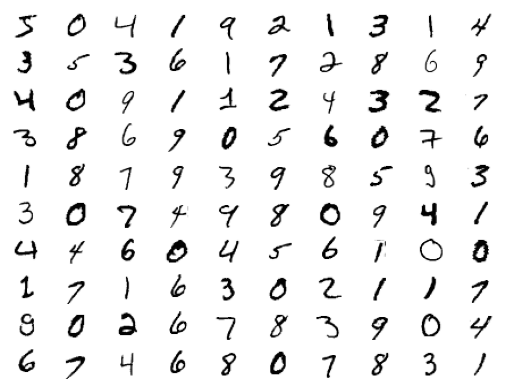

In [8]:
for i in range(100):
    ax = plt.subplot(10, 10, i+1)
    ax.axis('off')
    plt.imshow(training_images[i], cmap='Greys')



In [9]:

# Preparing the dataset
# Setup train and test splits
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()


In [10]:

# 28 x 28 = 784, because that's the dimensions of the MNIST data.
image_size = 784

# Reshaping the training_images and test_images to lists of vectors with length 784
# instead of lists of 2D arrays. Same for the test_images
training_data = training_images.reshape(training_images.shape[0], image_size)
test_data = test_images.reshape(test_images.shape[0], image_size)

In [11]:


# [
#     [1,2,3]
#     [4,5,6]
# ]

# => [1,2,3,4,5,6]

# Just showing the changes...
print("training data: ", training_images.shape, " ==> ", training_data.shape)
print("test data: ", test_images.shape, " ==> ", test_data.shape)


training data:  (60000, 28, 28)  ==>  (60000, 784)
test data:  (10000, 28, 28)  ==>  (10000, 784)


In [12]:

num_classes = 10 # Because it's how many digits we have (0-9)

# to_categorical takes a list of integers (our labels) and makes them into 1-hot vectors
training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

print(training_labels[0])


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:



# Sequential models are a series of layers applied linearly.
model = Sequential()
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])




In [15]:
history = model.fit(training_data, training_labels, batch_size=128, epochs=5, verbose=True, validation_split=.1)

loss, accuracy  = model.evaluate(test_data, test_labels, verbose=True)


Epoch 1/5
422/422 [==============================] - 2s 3ms/step - loss: 1.4267 - accuracy: 0.6196 - val_loss: 0.9770 - val_accuracy: 0.8077
Epoch 2/5
422/422 [==============================] - 1s 2ms/step - loss: 0.8746 - accuracy: 0.8118 - val_loss: 0.6932 - val_accuracy: 0.8688
Epoch 3/5
422/422 [==============================] - 1s 2ms/step - loss: 0.6853 - accuracy: 0.8520 - val_loss: 0.5609 - val_accuracy: 0.8875
Epoch 4/5
422/422 [==============================] - 1s 3ms/step - loss: 0.5854 - accuracy: 0.8680 - val_loss: 0.4843 - val_accuracy: 0.8968
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.4775 - accuracy: 0.8887


{'loss': [1.4266682863235474, 0.8746187090873718, 0.6853229403495789, 0.5853566527366638, 0.5241649150848389], 'accuracy': [0.6195926070213318, 0.8118148446083069, 0.8519999980926514, 0.8679629564285278, 0.877407431602478], 'val_loss': [0.9769937992095947, 0.6931740045547485, 0.5609322786331177, 0.48430782556533813, 0.43660131096839905], 'val_accuracy': [0.8076666593551636, 0.8688333630561829, 0.887499988079071, 0.8968333601951599, 0.9011666774749756]}


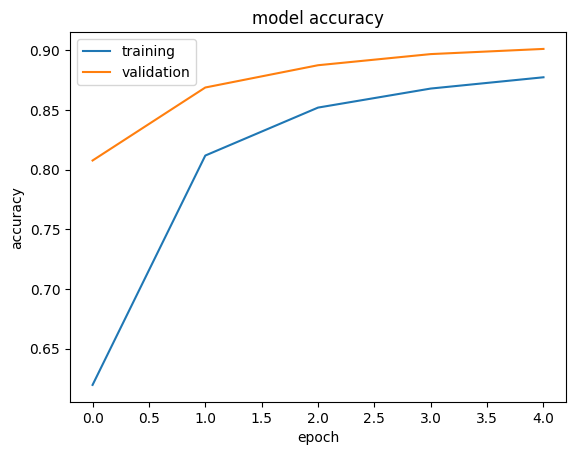

In [19]:


print(history.history)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()



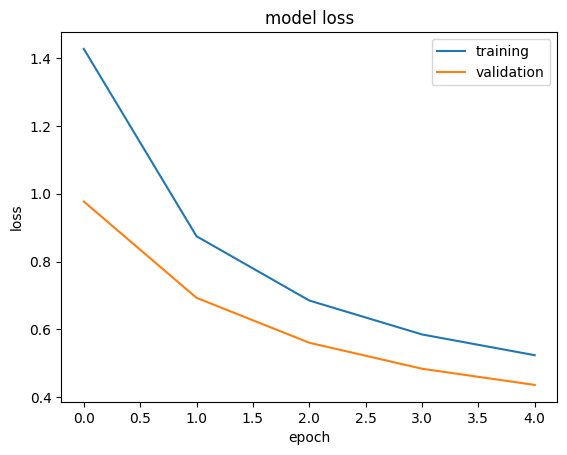

In [21]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

In [22]:

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Test loss: 0.477
Test accuracy: 0.889
